In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [187]:
#ler o arquivo

#arquivo = "cano_data.csv"
arquivo = "chess_data.csv"
#arquivo = "three_balls_data.csv"
#arquivo = "batman_data.csv"
#arquivo = "brasil.csv"

data = pd.read_csv(arquivo, names=['c1', 'c2', 'rotulos'])

In [202]:
data.describe()

,c1,c2,rotulos
count,5000.000000,5000.000000,5000.000000
mean,98.041200,96.361800,1.505200
std,55.781719,55.967632,0.500023
min,1.000000,1.000000,1.000000
25%,50.000000,48.000000,1.000000
50%,100.000000,96.000000,2.000000
75%,146.000000,145.000000,2.000000
max,192.000000,192.000000,2.000000


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   c1       5000 non-null   int64
 1   c2       5000 non-null   int64
 2   rotulos  5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


<Axes: xlabel='c1', ylabel='c2'>

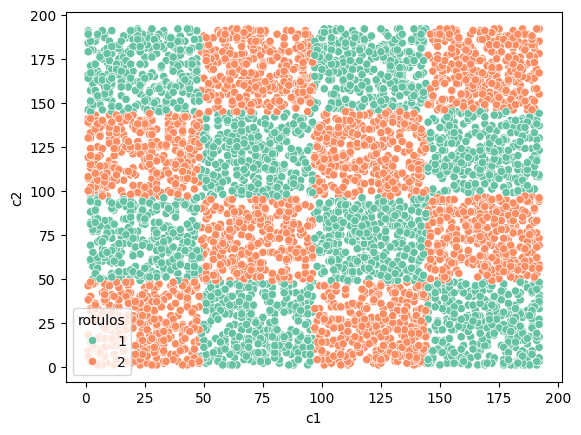

In [188]:
#plotar dispersao
sns.scatterplot(data=data, x='c1', y='c2', hue='rotulos', palette='Set2')

In [189]:
X = data.drop('rotulos', axis=1) # matriz das caracteristicas
y = data['rotulos']              # vetor de rotulos

#separando treino e test da mesma forma para todos os classificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)


In [190]:
# # Converta o DataFrame em uma matriz NumPy 
# x_array = X.values 

# x_array[:, 0]

# # Crie uma malha de valores para plotar a superfície de decisão
 
# xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
#                      np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

# Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plote a superfície de decisão
# plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
# plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

# plt.xlabel('caracteristica 1')
# plt.ylabel('caracteristica 2')
# plt.title('Superfície de Decisão')

# plt.show()

## FALTA FAZER: SUPERFICIE DE DECISAO, GRAFICO DE DISTRIBUIÇAO 

# MLP


In [191]:
#Modelo MLP
model = MLPClassifier(hidden_layer_sizes=(100, 5), max_iter=1000)  # Defina o número de camadas e neurônios conforme necessário
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 5), max_iter=1000)

In [192]:
# # Converta o DataFrame em uma matriz NumPy 
# x_array = X.values 

# x_array[:, 0]

# # Crie uma malha de valores para plotar a superfície de decisão
 
# xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
#                      np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

# Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plote a superfície de decisão
# plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
# plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

# plt.xlabel('caracteristica 1')
# plt.ylabel('caracteristica 2')
# plt.title('Superfície de Decisão')

# plt.show()

In [193]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [194]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

Acurácia: 0.636
Matriz de Confusão:
[[687  55]
 [491 267]]
Sensibilidade (Recall): 0.35224274406332456
Especificidade: 0.9258760107816711


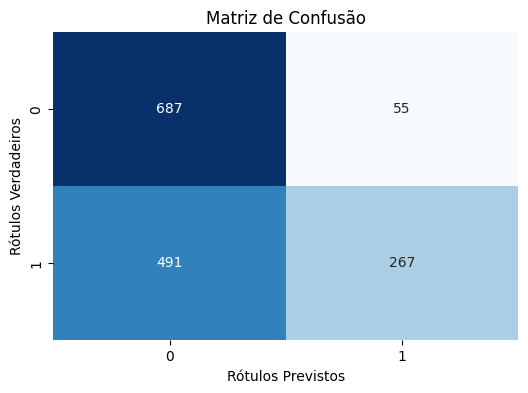

In [195]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# Naive Bayes

In [196]:
# Modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [197]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

AttributeError: 'GaussianNB' object has no attribute 'decision_function'

In [ ]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

Acurácia: 0.49466666666666664
Matriz de Confusão:
[[164 578]
 [180 578]]
Sensibilidade (Recall): 0.762532981530343
Especificidade: 0.2210242587601078


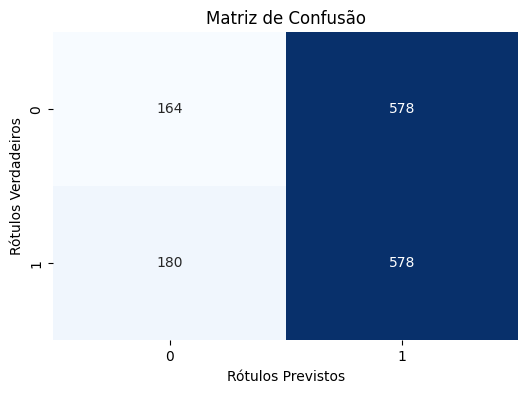

In [ ]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM Linear

In [ ]:
# Modelo SVM com kernel Linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [ ]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

Acurácia: 0.5053333333333333
Matriz de Confusão:
[[  0 742]
 [  0 758]]
Sensibilidade (Recall): 1.0
Especificidade: 0.0


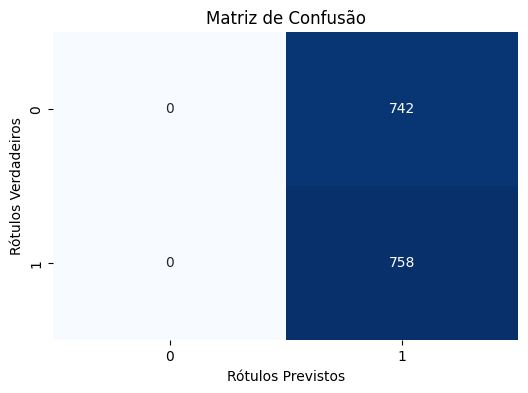

In [ ]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM Polinomial

In [ ]:
# Modelo SVC kernel polinomial
model = SVC(kernel='poly', degree=3)  # O grau (degree) define a ordem do kernel polinomial, vai depender do dataset
model.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [ ]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

Acurácia: 0.566
Matriz de Confusão:
[[177 565]
 [ 86 672]]
Sensibilidade (Recall): 0.8865435356200527
Especificidade: 0.238544474393531


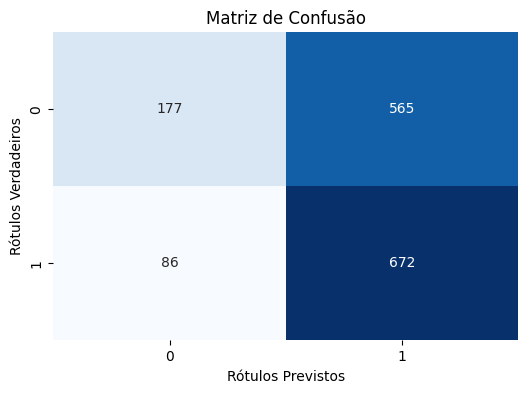

In [ ]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

# SVM RBF

In [198]:
# SVM com kernel RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Você pode ajustar os hiperparâmetros C e gamma conforme necessário
model.fit(X_train, y_train)

SVC()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


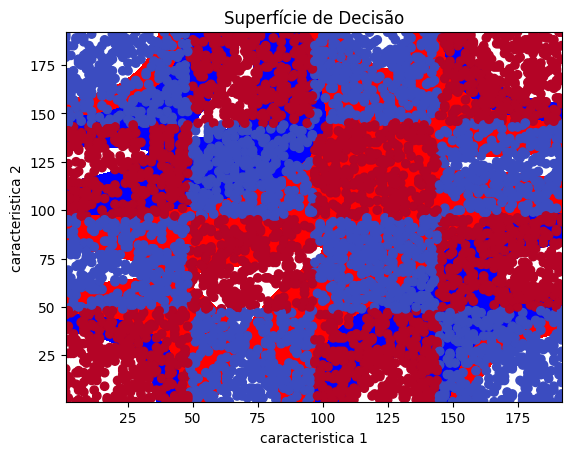

In [199]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# Crie uma malha de valores para plotar a superfície de decisão
 
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min(), x_array[:, 0].max(), 100),
                     np.linspace(x_array[:, 1].min(), x_array[:, 1].max(), 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'])
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.title('Superfície de Decisão')

plt.show()

In [ ]:
#Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
"""
Avaliaçao do modelo a partir de 3 metricas baseadas na Matriz de confusao: 
-Matriz de confusao
-Acuracia
-Sensibilidade
-Especificidade
"""
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print(f"Acurácia: {accuracy}")
print(f"Matriz de Confusão:\n{cm}")
print(f"Sensibilidade (Recall): {sensibilidade}")
print(f"Especificidade: {especificidade}")

Acurácia: 0.738
Matriz de Confusão:
[[601 141]
 [252 506]]
Sensibilidade (Recall): 0.6675461741424802
Especificidade: 0.8099730458221024


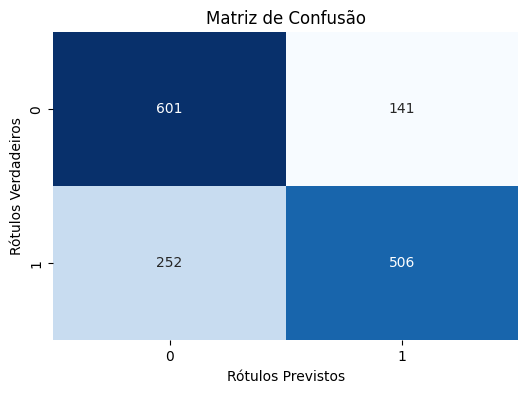

In [ ]:
# Matriz de confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Converta o DataFrame em uma matriz NumPy 
x_array = X.values 

x_array[:, 0]

# teste

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


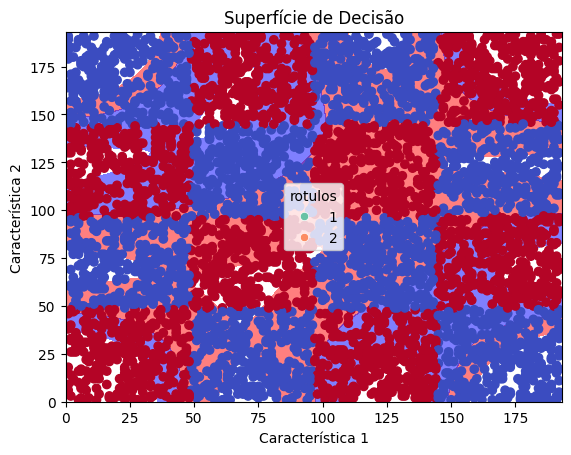

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Leitura dos dados
arquivo = 'chess_data.csv'
data = pd.read_csv(arquivo, names=['c1', 'c2', 'rotulos'])

# Plotar dispersão
sns.scatterplot(data=data, x='c1', y='c2', hue='rotulos', palette='Set2')

# Separando características e rótulos
X = data.drop('rotulos', axis=1) # matriz de características
y = data['rotulos']              # vetor de rótulos

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

# SVM com kernel RBF
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Você pode ajustar os hiperparâmetros C e gamma conforme necessário
model.fit(X_train, y_train)

# Converta o DataFrame em uma matriz NumPy
x_array = X.values

# Crie uma malha de valores para plotar a superfície de decisão
xx, yy = np.meshgrid(np.linspace(x_array[:, 0].min() - 1, x_array[:, 0].max() + 1, 100),
                     np.linspace(x_array[:, 1].min() - 1, x_array[:, 1].max() + 1, 100))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote a superfície de decisão
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue'], alpha=0.5)
plt.scatter(x_array[:, 0], x_array[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Superfície de Decisão')

plt.show()